# Visualizing Time Series Data - Lab

## Introduction

As mentioned in the lecture, time series visualizations play an important role in the analysis of time series data. Time series are often plotted to allow data diagnostics to identify temporal structures. 

In this lab, we'll cover main techniques for visualizing time series data in Python using the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia again. You might remember from the lesson that the units are in degrees Celsius and there are 3,650 observations. The [source](https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990) of the data is credited as the Australian Bureau of Meteorology.

## Objectives

You will be able to:

* Explore the temporal structure of time series with line plots
* Understand and describe the distribution of observations using histograms and density plots
* Measure the change in distribution over intervals using box and whisker plots and heat map plots

## Let's get started!

Import the necessary libraries

In [4]:
# Load required libraries
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# Load the data from min_temp.csv and check the index
df = pd.read_csv('min_temp.csv')


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

In [7]:
df.head()

,Date,Daily_min
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


Check the info. Next, make sure the index is the timestamp.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
Date         3650 non-null datetime64[ns]
Daily_min    3650 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.1 KB


Check the info again

In [9]:
df.set_index('Date', inplace = True)

## Time Series line plot

Create a time series line plot for `temp_data`

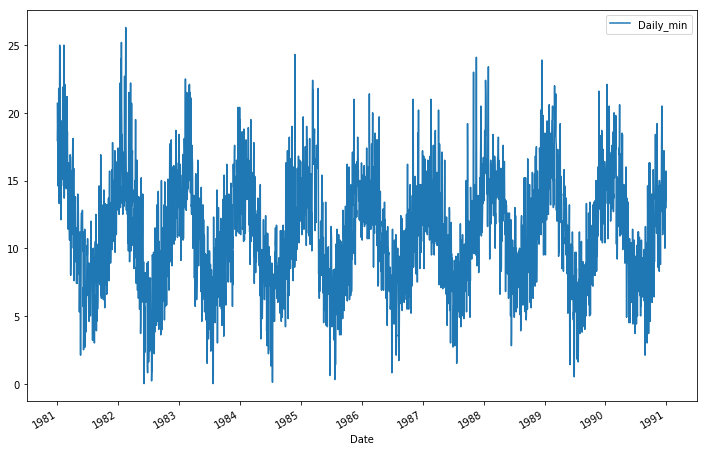

In [12]:
# Draw a line plot using temp_data 
df.plot(figsize=(12,8))


Some distinguishable patterns appear when we plot the data. Here we can see a pattern in our time series i.e. temperature values are maximum at the beginning of each year and minimum at around the 6th month. Yes, we are talking about Australia here so this is normal. This cyclical pattern is known as seasonality and will be covered in later labs. 

## Time Series dot plot
For a dense time series, as seen above, you may want to change the style of a line plot for a more refined visualization with a higher resolution of events. One way could be to change the continuous line to dots, each representing one entry in the time series. this can be achieved by `style` parameter of the line plot. lets pass `style='b.` as an argument to `.plot()` function

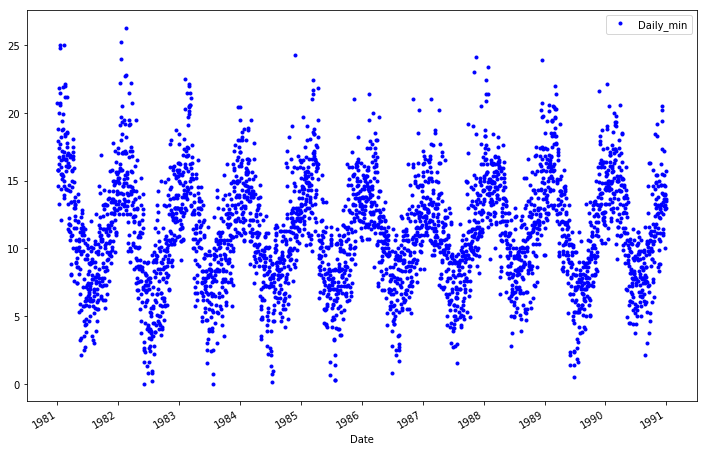

In [11]:
# Use dots instead on a continuous line and redraw the timeseries. 
df.plot(figsize=(12,8), style='.b')

This plot helps us identify clear outliers in certain years!

## Grouping and Visualizing time series data

Now, let's group data by year and create a line plot for each year for direct comparison.
You'll regroup data per year using `Pandas.grouper()`. 

- Import pandas grouper and use it to group values by year.
- Rearrange the data so you can create subplots for each year.

In [13]:
# Use pandas grouper to group values using annual frequency
year_groups = df.groupby(pd.Grouper(freq = 'A'))


In [ ]:
year_groups

In [21]:
#Create a new DataFrame and store yearly values in columns 
new_df = pd.DataFrame([])
for yr, group in year_groups:
    new_df[yr.year] = group.values.ravel()



[20.7 17.9 18.8 14.6 15.8 15.8 15.8 17.4 21.8 20.  16.2 13.3 16.7 21.5
 25.  20.7 20.6 24.8 17.7 15.5 18.2 12.1 14.4 16.  16.5 18.7 19.4 17.2
 15.5 15.1 15.4 15.3 18.8 21.9 19.9 16.6 16.8 14.6 17.1 25.  15.  13.7
 13.9 18.3 22.  22.1 21.2 18.4 16.6 16.1 15.7 16.6 16.5 14.4 14.4 18.5
 16.9 17.5 21.2 17.8 18.6 17.  16.  13.3 14.3 11.4 16.3 16.1 11.8 12.2
 14.7 11.8 11.3 10.6 11.7 14.2 11.2 16.9 16.7  8.1  8.   8.8 13.4 10.9
 13.4 11.  15.  15.7 14.5 15.8 16.7 16.8 17.5 17.1 18.1 16.6 10.  14.9
 15.9 13.   7.6 11.5 13.5 13.  13.3 12.1 12.4 13.2 13.8 10.6  9.  10.
  9.8 11.5  8.9  7.4  9.9  9.3  9.9  7.4  8.6 11.9 14.   8.6 10.  13.5
 12.  10.5 10.7  8.1 10.1 10.6  5.3  6.6  8.5 11.2  9.8  5.9  3.2  2.1
  3.4  5.4  9.6 11.5 12.3 12.6 11.  11.2 11.4 11.8 12.8 11.6 10.6  9.8
 11.2  5.7  7.1  2.5  3.5  4.6 11.   5.7  7.7 10.4 11.4  9.2  6.1  2.7
  4.3  6.3  3.8  4.4  7.1  4.8  5.8  6.2  7.3  9.2 10.2  9.5  9.5 10.7
 10.   6.5  7.   7.4  8.1  6.6  8.3  8.9  4.6  6.8  5.7  6.1  7.   7.2
  6.3 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faeb661d908>,
      dtype=object)

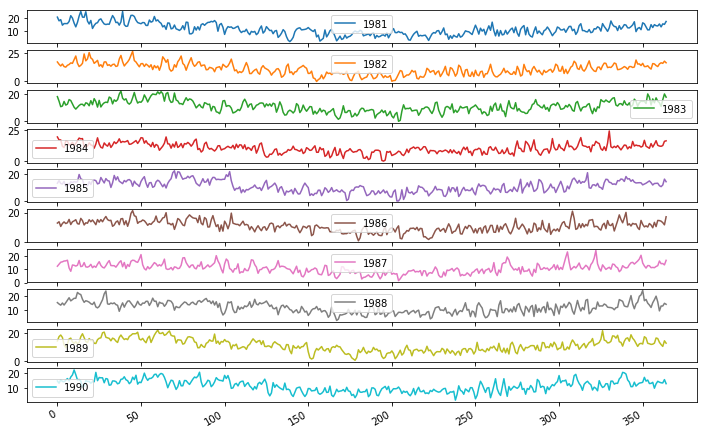

In [27]:
new_df.plot(figsize=(12,8), subplots=True, legend=True)

You can see 10 subplots corresponding to the number of columns in your new DataFrame. Each plot is 365 days in length following the annual frequency.

Now, plot the same plots in an overlapping way.

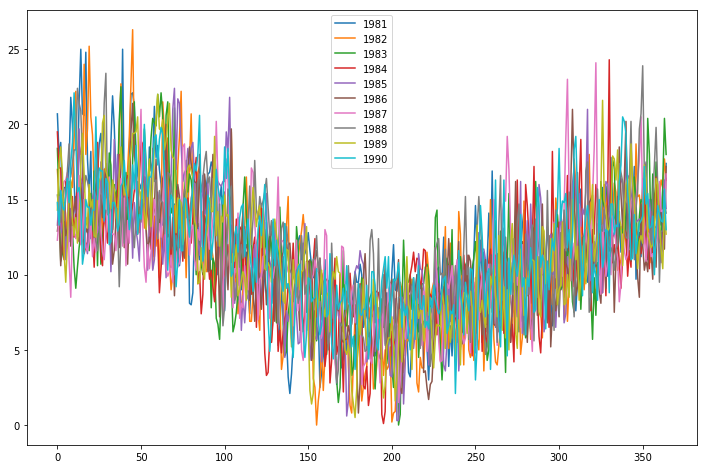

In [28]:
# Plot overlapping yearly groups 
new_df.plot(figsize=(12,8), subplots=False, legend=True)

We can see in both plots above that due the dense nature of time-series (365 values) and a high correlation between the values in different years (i.e. similar temperature values for each year), we can not clearly identify any differences in these groups. However, if you try this on the CO2 dataset used in the last lab, you should be able to see a clear trend showing an increase every year. 

## Time Series Histogram

Create a histogram for your data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ba4f5d9b0>]],
      dtype=object)

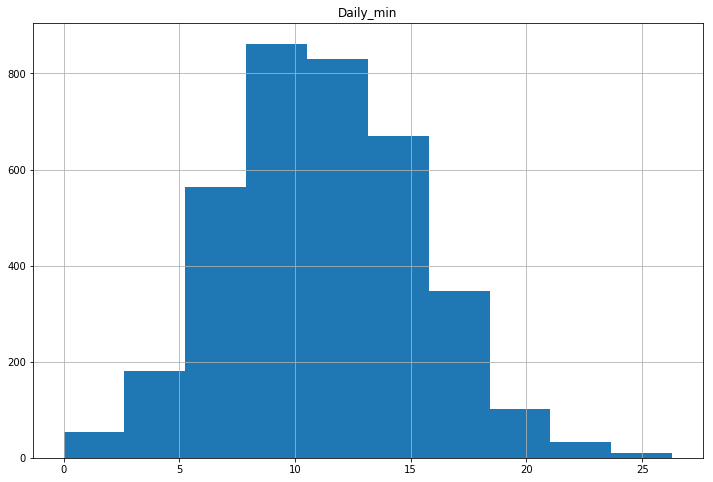

In [23]:
# Plot a histogram of the temperature dataset
df.hist(figsize=(12,8))

The plot shows a distribution that looks strongly Gaussian/Normal. The plotting function automatically selects the size of the bins based on the spread of values in the data.

## Time Series Density Plots
Create a time series density plot

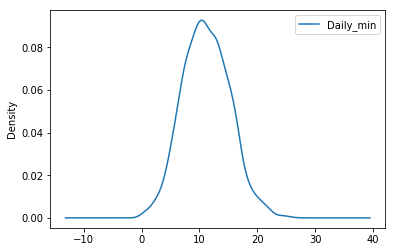

In [25]:
# Plot a density plot for temperature dataset
df.plot(kind = 'kde')

We can see that density plot provides a clearer summary of the distribution of observations. We can see that perhaps the distribution is a little asymmetrical and perhaps a little pointy to be Gaussian.

## Time Series Box and Whisker Plots by Interval

Let's use our groups by years to plot a box and whisker plot for each year for direct comparison using `boxplot()`.

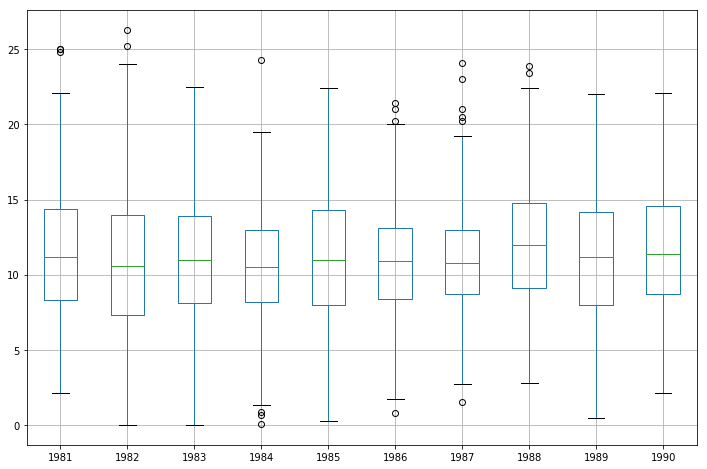

In [27]:
# Generate a box and whiskers plot for temp_annual dataframe
new_df.boxplot(figsize = (12,8))


In our plot above, we don't see much difference in the mean temperature over years, however, we can spot some outliers showing extremely cold or hot days. 

We can also plot distribution across months within each year. Perform following tasks to achieve this. 
1. Extract observations for year 1990 only, the last year in the dataset.

2. Group observations by month, and add each month to a new DataFrame as a column.

3. Create 12 box and whisker plots, one for each month of 1990.

In [28]:
# Use temp Dataset to extract values for 1990
data = df['1990']

# Add each month to dataFrame as a column
data_month = data.groupby(pd.Grouper(freq = 'MS'))
month_df = pd.DataFrame([])
for index,group i
# Set the column names for each month i.e. 1,2,3, .., 12

# Plot the box and whiskers plot for each month 


We see 12 box and whisker plots, showing the significant change in distribution of minimum temperatures across the months of the year from the Southern Hemisphere summer in January to the Southern Hemisphere winter in the middle of the year, and back to summer again.

## Time Series Heat Maps

Let's create a heatmap of the Minimum Daily Temperatures data. The `matshow()` function from the matplotlib library is used as no heatmap support is provided directly in Pandas.

1. Rotate (transpose) the `temp_annual` dataframe as a new matrix the matrix so that each row represents one year and each column one day. 
2. Use `matshow()` function to draw a heatmap for transposed yearly matrix. 

In [ ]:
##### Transpose the yearly group DataFrame and draw a heatmap with matshow()



We can now see that the plot shows the cooler minimum temperatures in the middle days of the years and the warmer minimum temperatures in the start and ends of the years, and all the fading and complexity in between.

Following this intuition, let's draw another heatmap comparing the months of the year in 1990. Each column represents one month, with rows representing the days of the month from 1 to 31.

In [ ]:
# draw a heatmap comparing the months of the year in 1990.


The plot shows the same macro trend seen for each year on the zoomed level of month-to-month. We can also see some white patches at the bottom of the plot. This is missing data for those months that have fewer than 31 days, with February being quite an outlier with 28 days in 1990.

## Summary 

In this lab, we discovered how to explore and better understand a time-series dataset in Python and Pandas. You learned how to explore the temporal relationships with line, scatter, and autocorrelation plots. We also explored the distribution of observations with histograms and density plots and change in distribution of observations with box and whisker and heat map plots.